In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging

logger = logging.getLogger()
logging.info('This is a debug message')
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
counter=1

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#If the city is unique, then add it to a our cities list
     if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

# List for holding lat_lngs and cities
lat = []
lng = []
maxtemp = []
windspeed = []
humidity=[]
date=[]
country=[]
cloudiness=[]
city=[]
responses = []

#loop through each city to get the json response
print(f"Beginning Data Retrieval")
print("-----------------------------------------")
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?appid="+api_key+"&units=Imperial" +"&q="+ city
    
    print("Processing Record " + str(counter) + " of Set 1 | " + str(city)+ "  " + str(url) )
    weather_response = requests.get(url).json()
    responses.append(weather_response)
    counter=counter+1

print("-------------------------------------")
print(f"Data Retrieval Complete")
print("-------------------------------------")

#Fetch lng, lat,Max temp, Wind Speed, Humidity,Date,City,Country,Cloudiness data from json response
lng= [res['coord']['lon'] for res in responses if 'coord' in res]
lat = [res['coord']['lat'] for res in responses if 'coord' in res]
maxtemp = [res['main']['temp_max'] for res in responses if 'main' in res]
windspeed = [res['wind']['speed'] for res in responses if 'wind' in res]
humidity = [res['main']['humidity'] for res in responses if 'main' in res]
date = [res['dt'] for res in responses if 'dt' in res]
city = [res['name'] for res in responses if 'name' in res]
country = [res['sys']['country'] for res in responses if 'sys' in res]
cloudiness=[res['clouds']['all'] for res in responses if 'clouds' in res]

#Create Selected cities dataframe
city_data = {"City": city,"Cloudiness":cloudiness,"Country":country,"Date":date , "Humidity":humidity , "Lat":lat,"Lng":lng,"Max Temp":maxtemp,"Wind Speed":windspeed}
city_df = pd.DataFrame(city_data)

#Drop Duplicate cities
city_df.drop_duplicates

#Select 500 sample cities
selected_cities_df = city_df.sample(500)

#Save output in csv
selected_cities_df.to_csv("../Output Csv/SelectedCities.csv",index=False, header=True)

selected_cities_df.head()


Beginning Data Retrieval
-----------------------------------------
Processing Record 1 of Set 1 | coihaique  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=coihaique
Processing Record 2 of Set 1 | mys shmidta  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=mys shmidta
Processing Record 3 of Set 1 | haguenau  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=haguenau
Processing Record 4 of Set 1 | port-cartier  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=port-cartier
Processing Record 5 of Set 1 | arraial do cabo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=arraial do cabo
Processing Record 6 of Set 1 | mataura  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperi

Processing Record 55 of Set 1 | karaul  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=karaul
Processing Record 56 of Set 1 | longyearbyen  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=longyearbyen
Processing Record 57 of Set 1 | esperance  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=esperance
Processing Record 58 of Set 1 | souillac  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=souillac
Processing Record 59 of Set 1 | kapaa  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kapaa
Processing Record 60 of Set 1 | east london  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=east london
Processing Record 61 of Set 1 | ponta do sol  http://api.openweatherma

Processing Record 108 of Set 1 | gambela  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=gambela
Processing Record 109 of Set 1 | buchanan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=buchanan
Processing Record 110 of Set 1 | rungata  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=rungata
Processing Record 111 of Set 1 | kadykchan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kadykchan
Processing Record 112 of Set 1 | kiama  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kiama
Processing Record 113 of Set 1 | ballina  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ballina
Processing Record 114 of Set 1 | hithadhoo  http://api.openweathermap.org/data/2

Processing Record 162 of Set 1 | poli  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=poli
Processing Record 163 of Set 1 | thap khlo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=thap khlo
Processing Record 164 of Set 1 | oda  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=oda
Processing Record 165 of Set 1 | agadez  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=agadez
Processing Record 166 of Set 1 | zanjan  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=zanjan
Processing Record 167 of Set 1 | itoman  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=itoman
Processing Record 168 of Set 1 | kaitangata  http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 216 of Set 1 | dwarka  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=dwarka
Processing Record 217 of Set 1 | ayolas  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ayolas
Processing Record 218 of Set 1 | ancud  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ancud
Processing Record 219 of Set 1 | tura  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tura
Processing Record 220 of Set 1 | svetlaya  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=svetlaya
Processing Record 221 of Set 1 | hamilton  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=hamilton
Processing Record 222 of Set 1 | mecca  http://api.openweathermap.org/data/2.5/weather?appid

Processing Record 270 of Set 1 | sidney  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=sidney
Processing Record 271 of Set 1 | mirabad  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=mirabad
Processing Record 272 of Set 1 | shihezi  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=shihezi
Processing Record 273 of Set 1 | beloomut  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=beloomut
Processing Record 274 of Set 1 | sitka  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=sitka
Processing Record 275 of Set 1 | tupa  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=tupa
Processing Record 276 of Set 1 | carangola  http://api.openweathermap.org/data/2.5/weather?a

Processing Record 323 of Set 1 | bathsheba  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=bathsheba
Processing Record 324 of Set 1 | kavieng  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kavieng
Processing Record 325 of Set 1 | avera  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=avera
Processing Record 326 of Set 1 | north mankato  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=north mankato
Processing Record 327 of Set 1 | pandrup  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=pandrup
Processing Record 328 of Set 1 | oranjestad  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=oranjestad
Processing Record 329 of Set 1 | san policarpo  http://api.openw

Processing Record 376 of Set 1 | mudyuga  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=mudyuga
Processing Record 377 of Set 1 | letterkenny  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=letterkenny
Processing Record 378 of Set 1 | betioky  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=betioky
Processing Record 379 of Set 1 | paita  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=paita
Processing Record 380 of Set 1 | livingstone  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=livingstone
Processing Record 381 of Set 1 | severo-yeniseyskiy  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=severo-yeniseyskiy
Processing Record 382 of Set 1 | tual  http://ap

Processing Record 429 of Set 1 | grand gaube  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=grand gaube
Processing Record 430 of Set 1 | dingle  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=dingle
Processing Record 431 of Set 1 | ternate  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ternate
Processing Record 432 of Set 1 | humberto de campos  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=humberto de campos
Processing Record 433 of Set 1 | killarney  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=killarney
Processing Record 434 of Set 1 | mehran  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=mehran
Processing Record 435 of Set 1 | teahupoo  http://ap

Processing Record 482 of Set 1 | keetmanshoop  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=keetmanshoop
Processing Record 483 of Set 1 | umzimvubu  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=umzimvubu
Processing Record 484 of Set 1 | mbala  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=mbala
Processing Record 485 of Set 1 | ubeda  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=ubeda
Processing Record 486 of Set 1 | champerico  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=champerico
Processing Record 487 of Set 1 | portree  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=portree
Processing Record 488 of Set 1 | miandrivazo  http://api.openweatherma

Processing Record 536 of Set 1 | amuntai  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=amuntai
Processing Record 537 of Set 1 | sharjah  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=sharjah
Processing Record 538 of Set 1 | chagoda  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=chagoda
Processing Record 539 of Set 1 | saint-ambroise  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=saint-ambroise
Processing Record 540 of Set 1 | kismayo  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kismayo
Processing Record 541 of Set 1 | kuldur  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=kuldur
Processing Record 542 of Set 1 | stulovo  http://api.openweathermap.or

Processing Record 589 of Set 1 | pecos  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=pecos
Processing Record 590 of Set 1 | sasykoli  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=sasykoli
Processing Record 591 of Set 1 | marsh harbour  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=marsh harbour
Processing Record 592 of Set 1 | novo aripuana  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=novo aripuana
Processing Record 593 of Set 1 | pilar  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=pilar
Processing Record 594 of Set 1 | bacuit  http://api.openweathermap.org/data/2.5/weather?appid=05388761f67caed29032fa50d61e801a&units=Imperial&q=bacuit
Processing Record 595 of Set 1 | rangapara  http://api.openweather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
520,Chokurdakh,12,RU,1532414611,73,70.62,147.90,51.02,17.49
540,Luanda,90,AO,1532412000,88,-8.83,13.24,68.00,2.24
433,Mbala,0,ZM,1532415075,72,-8.85,31.37,54.71,14.36
337,Kandrian,92,PG,1532415041,100,-6.21,149.55,74.15,3.51
480,Hibbing,1,US,1532412900,87,47.43,-92.94,62.60,8.55


## Perform API Calls

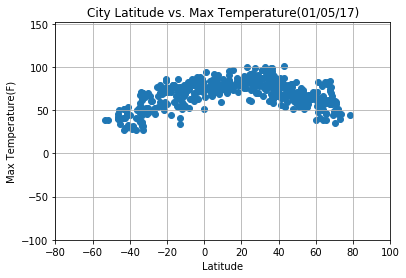

In [89]:
#Latitude Vs Temperature Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Max Temp'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-100, max(selected_cities_df['Max Temp'])+50)

#Display labels in graph
plt.title("City Latitude vs. Max Temperature(01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsTemp.png")



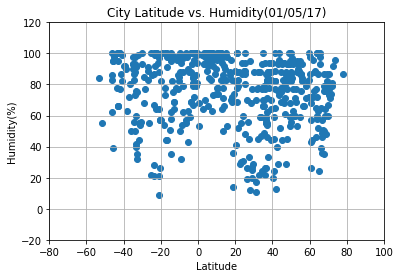

In [91]:
#Latitude Vs Humidity Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Humidity'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-20, max(selected_cities_df['Humidity'])+20)

#Display labels in graph
plt.title("City Latitude vs. Humidity(01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsHumidity.png")

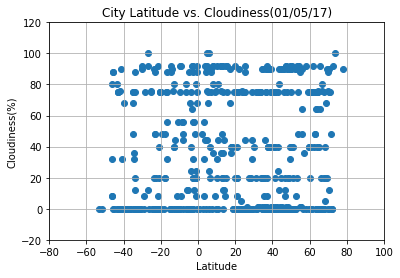

In [92]:
#Latitude Vs Cloudiness Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Cloudiness'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-20, max(selected_cities_df['Cloudiness'])+20)

#Display labels in graph
plt.title("City Latitude vs. Cloudiness(01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsCloudiness.png")

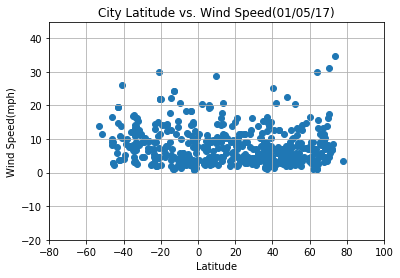

In [93]:
#Latitude Vs WindSpeed Plot

plt.scatter(selected_cities_df['Lat'],selected_cities_df['Wind Speed'])
plt.xlim(-80, len(selected_cities_df['Lat'])-400)
plt.ylim(-20, max(selected_cities_df['Wind Speed'])+10)

#Display labels in graph
plt.title("City Latitude vs. Wind Speed(01/05/17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

# Save Figure
plt.savefig("../Images/LatitudevsWindSpeed.png")